In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv('housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [6]:
# Split features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict on test set
y_pred = model.predict(X_test)

In [10]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
# Output metrics
print("Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
MAE (Mean Absolute Error): 970043.40
MSE (Mean Squared Error): 1754318687330.66
R² Score: 0.65


In [12]:
# Model Coefficients
print("\nModel Intercept:", model.intercept_)
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nModel Coefficients:")
print(coefficients)


Model Intercept: 260032.35760741215

Model Coefficients:
area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
parking                            2.248419e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
basement_yes                       3.902512e+05
hotwaterheating_yes                6.846499e+05
airconditioning_yes                7.914267e+05
prefarea_yes                       6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


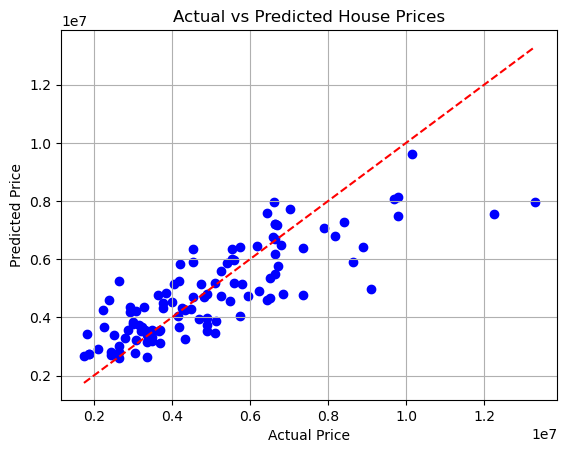

In [13]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()